<a href="https://colab.research.google.com/github/enwachukwu/abc/blob/main/NFLX_stock_price_predictio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#load dataset

In [ ]:
dataset_train =pd.read_csv('/content/drive/MyDrive/DataSet/nflx_stock_dataset_train.csv')


In [ ]:
dataset_train

In [ ]:
dataset_train.shape

In [ ]:
dataset_train.columns

In [ ]:
dataset_train.dtypes

In [ ]:
dataset_train.describe()

In [ ]:
dataset_train.isna()

In [ ]:
dataset_train.isna().sum()

In [ ]:
dataset_train.duplicated()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(dataset_train['Date'], dataset_train['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price Over Time')
plt.show

# The training dataset

In [ ]:
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
training_set

#feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

# data structure with timesteps and output

In [ ]:
x_train = []
y_train = []
for i in range(60,985):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
print(x_train)


In [ ]:
print(y_train)

In [ ]:
# Reshaping with reshape function which can be used to add more column
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
print(x_train)

# Importing the libraries and pakages for building the RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regrassor = Sequential()

In [ ]:
regrassor.add(LSTM(units= 50, return_sequences=True))
regrassor.add(Dropout(0.2))

In [ ]:
regrassor.add(LSTM(units= 50, return_sequences=True))
regrassor.add(Dropout(0.2))

In [ ]:
regrassor.add(LSTM(units= 50))
regrassor.add(Dropout(0.2))

In [ ]:
regrassor.add(Dense(units= 1))

In [ ]:
from keras.src.optimizers import adam
# Compiling the RNN
regrassor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Fitting the RNN to the training dataset
regrassor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
29/29 [==============================] - 6s 212ms/step - loss: 0.0016
Epoch 2/100
29/29 [==============================] - 4s 143ms/step - loss: 0.0016
Epoch 3/100
29/29 [==============================] - 4s 126ms/step - loss: 0.0016
Epoch 4/100
29/29 [==============================] - 4s 125ms/step - loss: 0.0018
Epoch 5/100
29/29 [==============================] - 6s 202ms/step - loss: 0.0015
Epoch 6/100
29/29 [==============================] - 4s 147ms/step - loss: 0.0016
Epoch 7/100
29/29 [==============================] - 3s 120ms/step - loss: 0.0016
Epoch 8/100
29/29 [==============================] - 4s 122ms/step - loss: 0.0014
Epoch 9/100
29/29 [==============================] - 5s 191ms/step - loss: 0.0015
Epoch 10/100
29/29 [==============================] - 5s 163ms/step - loss: 0.0016
Epoch 11/100
29/29 [==============================] - 3s 119ms/step - loss: 0.0015
Epoch 12/100
29/29 [==============================] - 3s 119ms/step - loss: 0.0016
Epoch 13/100


# Making the predictions and visualizing the results

In [ ]:
dataset_test =pd.read_csv('/content/drive/MyDrive/DataSet/nflx_stock_dataset_test.csv')

In [ ]:
dataset_test

In [ ]:
oreginal_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
# Getting the predicted stock price.
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regrassor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 76ms/step


In [ ]:
predicted_stock_price

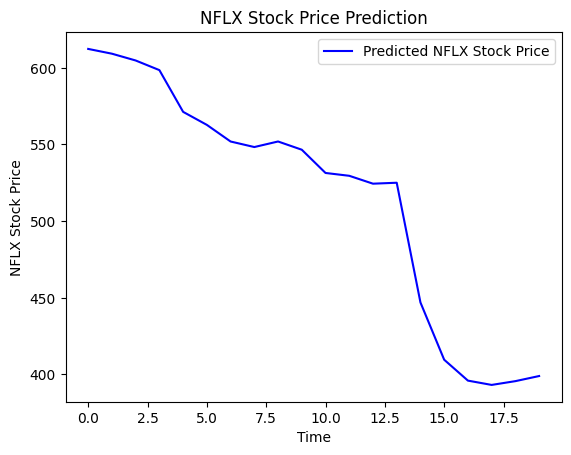

In [ ]:
#Visualizing the fresult

plt.plot(predicted_stock_price ,color = 'blue', label = 'Predicted NFLX Stock Price' )
plt.title('NFLX Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NFLX Stock Price')
plt.legend()
plt.show()

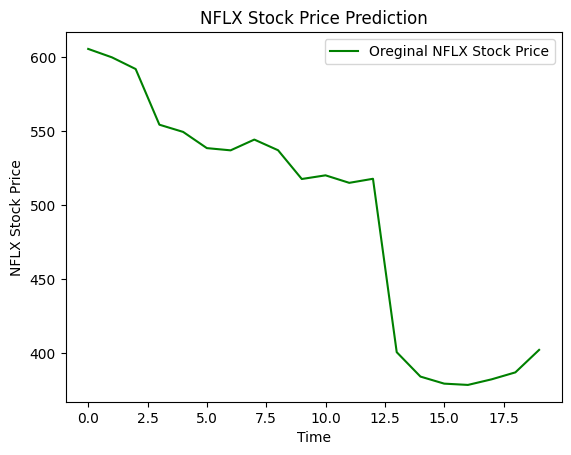

In [ ]:
plt.plot(oreginal_stock_price ,color = 'Green', label = 'Oreginal NFLX Stock Price' )
plt.title('NFLX Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NFLX Stock Price')
plt.legend()
plt.show()